#**Grouping Soccer Players with Similar Skillsets in FIFA 20**
# Part 2: Hierarchical Clustering

- Author: Jaemin Lee (aka. Import Data)

- [Import Data YouTube Channel](https://www.youtube.com/channel/UCYDacpfRrCX6_8oDDlzTgFw)
- [GitHub Repo](https://github.com/importdata/Clustering-FIFA-20-Players)

#Data Cleaning/Pre-processing (code from part 1)

In [3]:
import pandas as pd
import numpy as np

df = pd.read_csv("/content/players_20.csv")

df = df[['short_name','age', 'height_cm', 'weight_kg', 'overall', 'potential',
       'value_eur', 'wage_eur', 'international_reputation', 'weak_foot',
       'skill_moves', 'release_clause_eur', 'team_jersey_number',
       'contract_valid_until', 'nation_jersey_number', 'pace', 'shooting',
       'passing', 'dribbling', 'defending', 'physic', 'gk_diving',
       'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed',
       'gk_positioning', 'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'power_shot_power',
       'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
       'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentality_composure', 'defending_marking', 'defending_standing_tackle',
       'defending_sliding_tackle', 'goalkeeping_diving',
       'goalkeeping_handling', 'goalkeeping_kicking',
       'goalkeeping_positioning', 'goalkeeping_reflexes']]

df = df[df.overall > 86] # extracting players with overall above 86

df = df.fillna(df.mean())

names = df.short_name.tolist() # saving names for later

df = df.drop(['short_name'], axis = 1) # drop the short_name column
df.head()

,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,international_reputation,weak_foot,skill_moves,release_clause_eur,team_jersey_number,contract_valid_until,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,32,170,72,94,94,95500000,565000,5,4,4,195800000.0,10.0,2021.0,8.529412,87.000000,92.000000,92.000000,96.000000,39.000000,66.000000,87.5,85.1,80.0,89.2,54.4,86.4,88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8
1,34,187,83,93,93,58500000,405000,5,4,5,96500000.0,7.0,2022.0,7.000000,90.000000,93.000000,82.000000,89.000000,35.000000,78.000000,87.5,85.1,80.0,89.2,54.4,86.4,84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11
2,27,175,68,92,92,105500000,290000,5,5,5,195200000.0,10.0,2022.0,10.000000,91.000000,85.000000,87.000000,95.000000,32.000000,58.000000,87.5,85.1,80.0,89.2,54.4,86.4,87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11
3,26,188,87,91,93,77500000,125000,3,3,1,164700000.0,13.0,2023.0,1.000000,75.488889,74.666667,78.844444,81.977778,61.333333,73.777778,87.0,92.0,78.0,89.0,52.0,90.0,13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89
4,28,175,74,91,91,90000000,470000,4,4,4,184500000.0,7.0,2024.0,10.000000,91.000000,83.000000,86.000000,94.000000,35.000000,66.000000,87.5,85.1,80.0,89.2,54.4,86.4,81,84,61,89,83,95,83,79,83,94,94,88,95,90,94,82,56,84,63,80,54,41,87,89,88,91,34,27,22,11,12,6,8,8


#Standardizing data

In [4]:
from sklearn import preprocessing

x = df.values # numpy array
scaler = preprocessing.MinMaxScaler()
x_scaled = scaler.fit_transform(x)
X_norm = pd.DataFrame(x_scaled)

#Hierarchical Clustering with Average Linkage

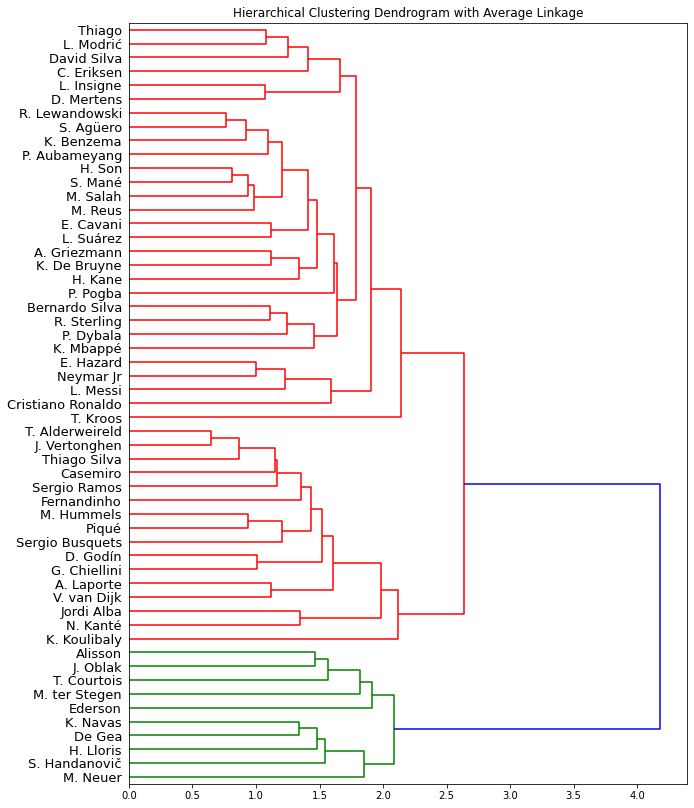

In [31]:
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch

# plot dendrogram using average linkage
plt.figure(figsize=(10,14))
plt.title('Hierarchical Clustering Dendrogram with Average Linkage')

dendrogram = sch.dendrogram(sch.linkage(X_norm, method="average"), labels= names, leaf_font_size = 13, orientation='right')

# Hierarchical Clustering with Single Linkage




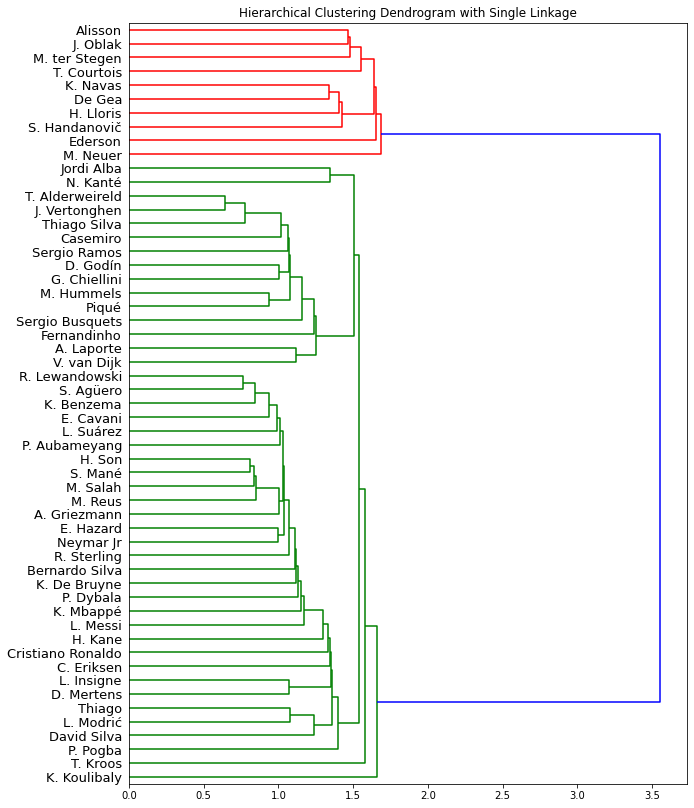

In [30]:
# plot dendrogram using single linkage
plt.figure(figsize=(10,14))
plt.title('Hierarchical Clustering Dendrogram with Single Linkage')

dendrogram = sch.dendrogram(sch.linkage(X_norm, method="single"), labels= names, leaf_font_size = 13, orientation='right')

# Hierarchical Clustering with Centroid Linkage

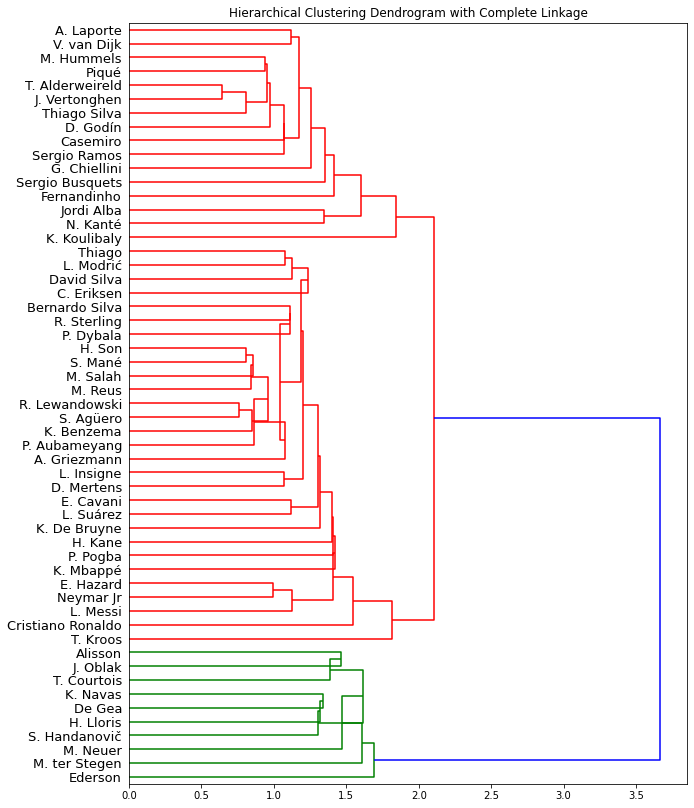

In [32]:
# plot dendrogram using centroid linkage
plt.figure(figsize=(10,14))
plt.title('Hierarchical Clustering Dendrogram with Centroid Linkage')

dendrogram = sch.dendrogram(sch.linkage(X_norm, method="centroid"), labels= names, leaf_font_size = 13, orientation='right')

# Hierarchical Clustering with Complete Linkage

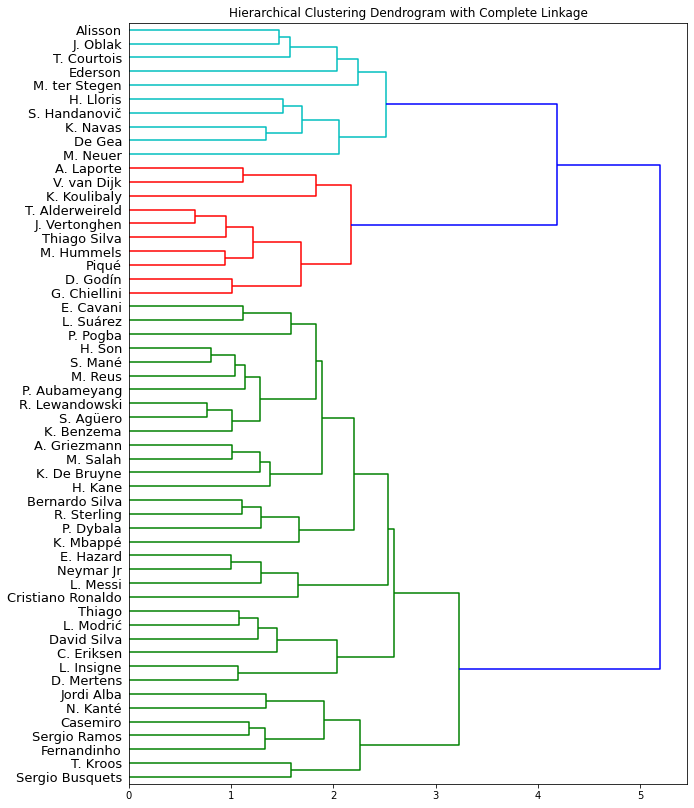

In [29]:
# plot dendrogram using complete linkage
plt.figure(figsize=(10,14))
plt.title('Hierarchical Clustering Dendrogram with Complete Linkage')

dendrogram = sch.dendrogram(sch.linkage(X_norm, method="complete"), labels= names, leaf_font_size = 13, orientation='right')